In [243]:
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.figure_factory as ff
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import plotly.figure_factory as ff
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [244]:
data = pd.read_csv("./data/merged_data.csv")
data.head()

,Unnamed: 0,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [245]:
data= data.drop(columns=['Unnamed: 0'])

In [246]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [247]:
data.head()

,track_id,genre,title,chroma_cens1,chroma_cens2,chroma_cens3,chroma_cens4,chroma_cens5,chroma_cens6,chroma_cens7,...,spectral_contrast6,spectral_contrast7,spectral_rolloff1,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,zcr1
0,135054,Experimental,Hari Karl (for Larry Eisenberg),0.310373,0.308683,0.290821,0.297749,0.287629,0.260195,0.229743,...,17.265811,42.597892,2571.502445,-0.002862,-0.000695,0.004706,-0.006419,0.005246,-0.001563,0.070002
1,135336,Pop,Slow and Steady,0.161290,0.161296,0.190398,0.171992,0.189878,0.187176,0.231823,...,20.103589,33.081974,4486.854020,-0.006867,-0.004326,-0.092237,0.019405,-0.006026,0.015697,0.085219
2,135337,Pop,The Dream and the Dreamer,0.443386,0.357355,0.191626,0.202726,0.284854,0.236113,0.234724,...,21.580315,32.187206,4382.598041,0.024635,-0.007949,0.011779,0.130071,0.014134,0.009135,0.108170
3,135043,Folk,Babel,0.141946,0.153972,0.169128,0.218597,0.385648,0.400918,0.308826,...,21.147088,32.537513,4162.319868,0.017150,-0.001607,-0.063755,0.005411,0.006720,-0.011991,0.074080
4,135091,Experimental,Tree and Wind,0.017648,0.017463,0.035690,0.158926,0.163426,0.064951,0.212070,...,19.401185,34.605480,4653.557040,-0.002268,-0.042291,0.160464,-0.144974,0.053375,-0.030622,0.100463


In [248]:
#explore data
print(f'Number of variables - {data.shape[1]}\n')
print(f'Data Types for each variable - \n{data.dtypes}\n')
print(f'Number of variables for each data type - \n{data.dtypes.value_counts()}')

Number of variables - 77

Data Types for each variable - 
track_id          int64
genre            object
title            object
chroma_cens1    float64
chroma_cens2    float64
                 ...   
tonnetz3        float64
tonnetz4        float64
tonnetz5        float64
tonnetz6        float64
zcr1            float64
Length: 77, dtype: object

Number of variables for each data type - 
float64    74
object      2
int64       1
dtype: int64


In [249]:
#search missing data
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]

#Printing null counts for columns that have null count >0
print(f'Null count for Columns - \n{null_count}\n\n')

#Printing % of null counts for columns that have null count>0
for column, null_co in null_count.iteritems():
    print(f'Percentage of missing values for Column {column} - {null_co*100/data.shape[0]:.2f} %')
    if (null_co*100/data.shape[0]) > 0:
      col = column 
      data[data.isnull().any(axis=1)][[col]]

Null count for Columns - 
Series([], dtype: int64)




In [250]:
data = data.dropna()

In [251]:
#Counting Null values for each column
null_count = data.isnull().sum()
null_count = null_count[null_count>0]
print(null_count)

Series([], dtype: int64)


In [252]:
#Checking boolean False counts for each column, an empty/blank string or integer 0 will result in a False value
#for boolean type
bool_counts = data.astype(bool).sum(axis=0)
for col, val in bool_counts.iteritems():
    print(f'{col} Percentage Boolean False Counts {(data.shape[0]-val)*100/data.shape[0]:.2f}')

track_id Percentage Boolean False Counts 0.00
genre Percentage Boolean False Counts 0.00
title Percentage Boolean False Counts 0.00
chroma_cens1 Percentage Boolean False Counts 0.03
chroma_cens2 Percentage Boolean False Counts 0.03
chroma_cens3 Percentage Boolean False Counts 0.03
chroma_cens4 Percentage Boolean False Counts 0.01
chroma_cens5 Percentage Boolean False Counts 0.01
chroma_cens6 Percentage Boolean False Counts 0.03
chroma_cens7 Percentage Boolean False Counts 0.01
chroma_cens8 Percentage Boolean False Counts 0.01
chroma_cens9 Percentage Boolean False Counts 0.01
chroma_cens10 Percentage Boolean False Counts 0.03
chroma_cens11 Percentage Boolean False Counts 0.03
chroma_cens12 Percentage Boolean False Counts 0.03
chroma_cqt1 Percentage Boolean False Counts 0.01
chroma_cqt2 Percentage Boolean False Counts 0.01
chroma_cqt3 Percentage Boolean False Counts 0.01
chroma_cqt4 Percentage Boolean False Counts 0.01
chroma_cqt5 Percentage Boolean False Counts 0.01
chroma_cqt6 Percenta

<AxesSubplot:xlabel='genre', ylabel='count'>

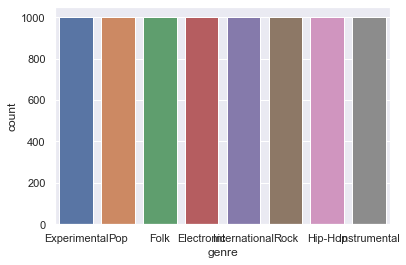

In [253]:
sns.countplot(x = 'genre', data = data)

In [254]:
labels = data.genre.unique()

Partition data

In [255]:
data.count()

track_id        7997
genre           7997
title           7997
chroma_cens1    7997
chroma_cens2    7997
                ... 
tonnetz3        7997
tonnetz4        7997
tonnetz5        7997
tonnetz6        7997
zcr1            7997
Length: 77, dtype: int64

In [256]:
data_new = data.drop(columns=['genre','title', 'track_id'])

In [257]:
#classification data splitting 
X_train,X_test, Y_train, Y_test = train_test_split(data_new.iloc[:,:], data['genre'], test_size = 0.2, random_state=1)

In [258]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6397 entries, 5418 to 5157
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         6397 non-null   float64
 1   chroma_cens2         6397 non-null   float64
 2   chroma_cens3         6397 non-null   float64
 3   chroma_cens4         6397 non-null   float64
 4   chroma_cens5         6397 non-null   float64
 5   chroma_cens6         6397 non-null   float64
 6   chroma_cens7         6397 non-null   float64
 7   chroma_cens8         6397 non-null   float64
 8   chroma_cens9         6397 non-null   float64
 9   chroma_cens10        6397 non-null   float64
 10  chroma_cens11        6397 non-null   float64
 11  chroma_cens12        6397 non-null   float64
 12  chroma_cqt1          6397 non-null   float64
 13  chroma_cqt2          6397 non-null   float64
 14  chroma_cqt3          6397 non-null   float64
 15  chroma_cqt4          6397 non-null 

In [259]:
# Explore test set
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 4739 to 6011
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chroma_cens1         1600 non-null   float64
 1   chroma_cens2         1600 non-null   float64
 2   chroma_cens3         1600 non-null   float64
 3   chroma_cens4         1600 non-null   float64
 4   chroma_cens5         1600 non-null   float64
 5   chroma_cens6         1600 non-null   float64
 6   chroma_cens7         1600 non-null   float64
 7   chroma_cens8         1600 non-null   float64
 8   chroma_cens9         1600 non-null   float64
 9   chroma_cens10        1600 non-null   float64
 10  chroma_cens11        1600 non-null   float64
 11  chroma_cens12        1600 non-null   float64
 12  chroma_cqt1          1600 non-null   float64
 13  chroma_cqt2          1600 non-null   float64
 14  chroma_cqt3          1600 non-null   float64
 15  chroma_cqt4          1600 non-null 

**Standardize the data**

In [217]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [218]:
cv_scores_dict = {}
C_values = [0.01,0.1,1,5,10]
for kernel in ['linear', 'rbf']:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_C_Value = C_values[cv_scores.index(max_cv_score)]
    cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score}
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}}


In [219]:
cv_scores_dict = {'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}}

In [220]:
C_values = [0.01,0.1,1,5,10]
kernel = 'poly'
for degree in [2,3,4,5]:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c, degree= degree)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_C_Value = C_values[cv_scores.index(max_cv_score)]
    cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score, 'degree': degree}
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}, 'poly': {'C': 10, 'cv_score': 0.38033646322378717, 'degree': 5}}


In [221]:
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}, 'poly': {'C': 10, 'cv_score': 0.38033646322378717, 'degree': 5}}


In [222]:
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train, Y_train)
predicted_labels = svm_model.predict(X_test)


In [223]:
print(cv_scores_dict)

{'linear': {'C': 1, 'cv_score': 0.4689671361502348}, 'rbf': {'C': 5, 'cv_score': 0.5107103384194053}, 'poly': {'C': 10, 'cv_score': 0.38033646322378717, 'degree': 5}}


In [224]:
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train, Y_train)
predicted_labels = svm_model.predict(X_test)


0.3425


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

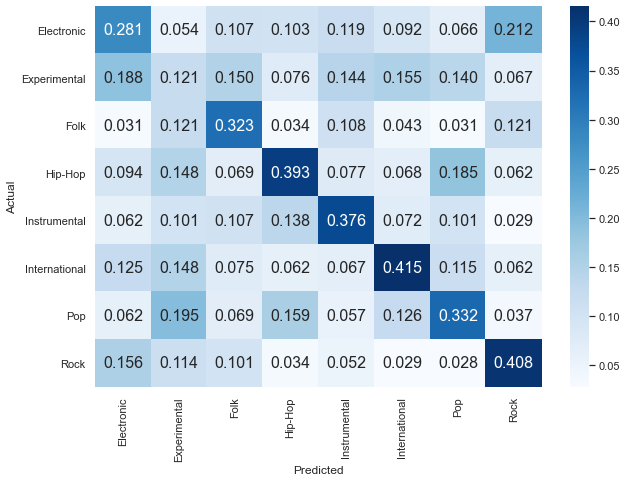

In [225]:
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(Y_test, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

In [226]:
scores = f_classif(X_train_scaled, Y_train)[0]
df_scores = pd.DataFrame(scores)
df_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']
top_feature_scores = feature_scores.nlargest(40,'Score')
print(top_feature_scores)

           Feature_Name       Score
57  spectral_bandwidth1  321.415397
66    spectral_rolloff1  304.706446
58   spectral_centroid1  265.988840
61   spectral_contrast3  261.504960
62   spectral_contrast4  258.677142
36                mfcc1  253.961528
37                mfcc2  252.070995
63   spectral_contrast5  249.653095
60   spectral_contrast2  240.169166
51               mfcc16  182.525809
49               mfcc14  162.937938
64   spectral_contrast6  160.490255
34        chroma_stft11  152.362421
47               mfcc12  145.616917
45               mfcc10  139.931224
32         chroma_stft9  135.734431
27         chroma_stft4  135.422010
43                mfcc8  130.695051
56                rmse1  126.532468
50               mfcc15  125.102781
25         chroma_stft2  123.612486
48               mfcc13  122.609271
29         chroma_stft6  120.045963
46               mfcc11  117.342093
53               mfcc18  113.390780
73                 zcr1  110.221439
30         chroma_stft7  108

In [227]:
X_train_selected_features = X_train[top_feature_scores['Feature_Name']]
X_test_selected_features = X_test[top_feature_scores['Feature_Name']]
scaler = StandardScaler()
scaler.fit(X_train_selected_features)
X_train_scaled_selected_features = scaler.transform(X_train_selected_features)
X_test_scaled_selected_features = scaler.transform(X_test_selected_features)

In [228]:
cv_scores_dict = {}
C_values = [0.01,0.1,1,5,10]
for kernel in ['linear', 'rbf']:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled_selected_features, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_C_Value = C_values[cv_scores.index(max_cv_score)]
    cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score}
print(cv_scores_dict)

{'linear': {'C': 5, 'cv_score': 0.45630648474178404}, 'rbf': {'C': 5, 'cv_score': 0.5042982198748043}}


In [229]:
C_values = [0.01,0.1,1,5,10]
kernel = 'poly'
for degree in [2,3,4,5]:
    cv_scores = []
    for c in C_values:    
        SVM_model = SVC(kernel = kernel, C=c, degree= degree)
        cv_scores.append(np.mean(cross_val_score(SVM_model, X_train_scaled_selected_features, Y_train, cv=10,n_jobs=-1)))
    max_cv_score = max(cv_scores)
    max_C_Value = C_values[cv_scores.index(max_cv_score)]
    cv_scores_dict[kernel] = {'C': max_C_Value, 'cv_score': max_cv_score, 'degree': degree}
print(cv_scores_dict)

{'linear': {'C': 5, 'cv_score': 0.45630648474178404}, 'rbf': {'C': 5, 'cv_score': 0.5042982198748043}, 'poly': {'C': 10, 'cv_score': 0.3940906201095461, 'degree': 5}}


In [230]:
svm_model = SVC(kernel = 'rbf', C=5, )
svm_model.fit(X_train_scaled_selected_features, Y_train)
predicted_labels = svm_model.predict(X_test_scaled_selected_features)


0.510625


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

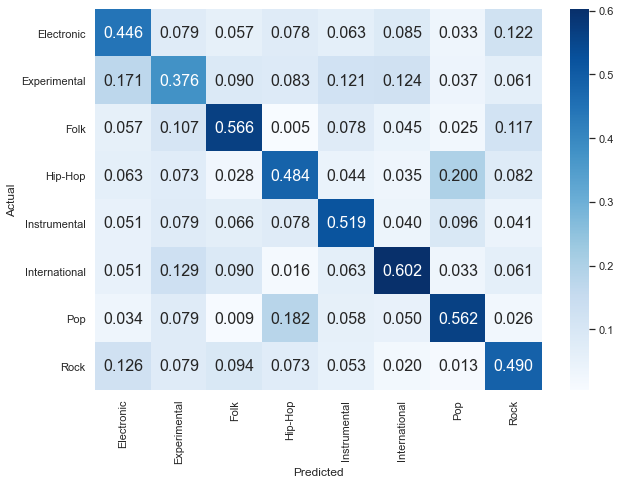

In [231]:
accuracy = accuracy_score(Y_test, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(Y_test, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

7997
[0 1 2 3 4 5 6 7]
0.24934350381393022


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

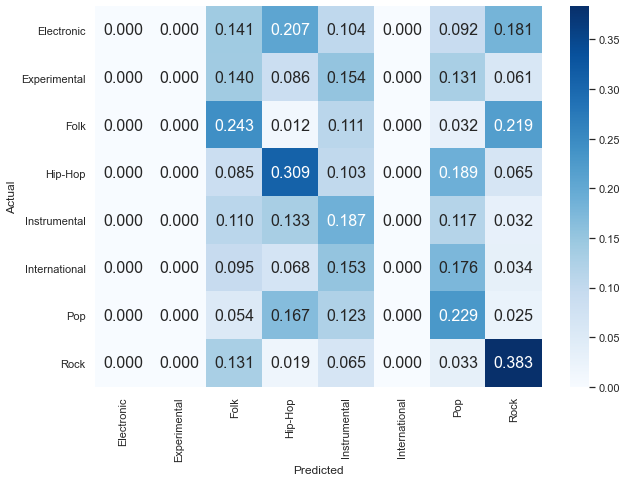

In [273]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0] 
        permutation.append(new_label)
    return permutation

from sklearn.cluster import KMeans
import scipy
X=data_new
print(len(X))
true_labels = data['genre']
len(true_labels)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
clf = KMeans(n_clusters = 8, init='random')
clf.fit(X)
print(np.unique(clf.labels_))
permutation = find_permutation(8, true_labels, clf.labels_)
predicted_labels = [ permutation[label] for label in clf.labels_]
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(true_labels, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(true_labels), index = np.unique(true_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")

7997
[0 1 2 3 4]
0.25146930098787046


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

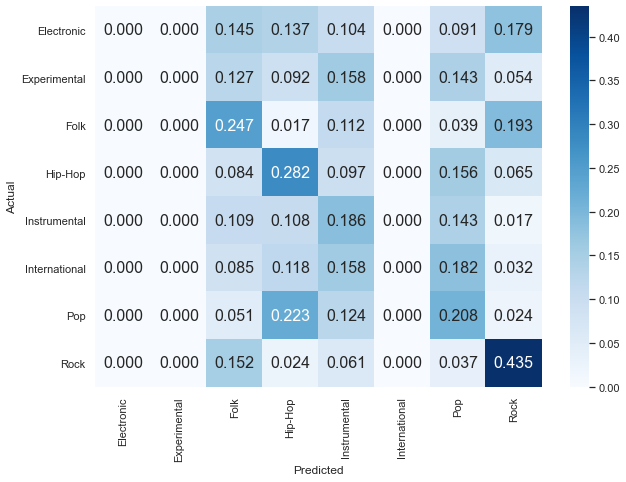

In [278]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        new_label=scipy.stats.mode(real_labels[idx])[0][0] 
        permutation.append(new_label)
    return permutation

scores = f_classif(X_train_scaled, Y_train)[0]
df_scores = pd.DataFrame(scores)
df_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']
top_feature_scores = feature_scores.nlargest(20,'Score')

from sklearn.cluster import KMeans
import scipy
X=data_new
X = X[top_feature_scores['Feature_Name']]
print(len(X))
true_labels = data['genre']
len(true_labels)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
clf = KMeans(n_clusters = 5, init='random')
clf.fit(X)
print(np.unique(clf.labels_))
permutation = find_permutation(5, true_labels, clf.labels_)
predicted_labels = [ permutation[label] for label in clf.labels_]
accuracy = accuracy_score(true_labels, predicted_labels)
print(accuracy)
confusion_mat_data = confusion_matrix(true_labels, predicted_labels, normalize='pred', labels = labels)
df_cm = pd.DataFrame(confusion_mat_data, columns=np.unique(true_labels), index = np.unique(true_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt = ".3f")